In [16]:
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

9.254917400782803e-63
1.1533398463688403e-135
3.291176796855621e-49


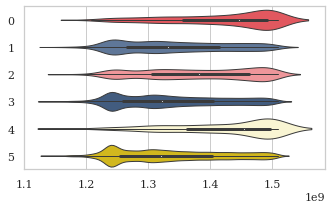

In [17]:
plt.rc('font', family='serif')
plt.rc('text', usetex=False)
sns.set(style="whitegrid", font="serif")
color_mine = ["#F8414A", "#5676A1", "#FD878D", "#385A89",  "#FFFACD", "#EFCC00"]

df = pd.read_csv("../data/users_neighborhood_anon.csv")
df = df[df["created_at"].notnull()]

men = [df[df.hate == "hateful"],
       df[df.hate == "normal"],
       df[df.hate_neigh],
       df[df.normal_neigh],
       df[df.is_63_2 == True],
       df[df.is_63_2 == False]]
tmp = []

for category in men:
    tmp.append(category["created_at"].values)

f, axs = plt.subplots(1, 1, figsize=(5.4, 3))
sns.violinplot(ax=axs, data=tmp, palette=color_mine, orient="h", linewidth=1)
axs.set_ylabel("")
axs.set_xlabel("")

_, n_h = stats.ttest_ind(men[0]["created_at"].values, men[1]["created_at"].values, equal_var=False)
_, nn_nh = stats.ttest_ind(men[2]["created_at"].values, men[3]["created_at"].values, equal_var=False)
_, s_ns = stats.ttest_ind(men[4]["created_at"].values, men[5]["created_at"].values, equal_var=False)
print(n_h)
print(nn_nh)
print(s_ns)

In [18]:
x = df.created_at.values
x_ticks = np.arange(min(x), max(x)+1, 3.154e+7)
axs.set_xticks(np.arange(min(x), max(x)+1, 3.154e+7))
f.canvas.draw()
axs.set_title("Creation Date of Users")

labels = [datetime.fromtimestamp(item).strftime('%Y-%m') for item in x_ticks]
axs.set_xticklabels(labels, rotation=35)
axs.set_yticklabels(["", "", "", ""], rotation=20)
f.tight_layout()

In [19]:
f.savefig("results/created_at.pdf")